<a href="https://colab.research.google.com/github/sampatk20/Cryptocurrency-Price-Prediction-/blob/main/Crypto_price_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Required Libraries and Preparing The Dataset For Evaluation**



In [ ]:
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore',category=FutureWarning)

**Scrapping the data** using an inbuilt library **get_data_yahoo** in python directly from **Yahoo Finance Website**

In [ ]:
df=reader.get_data_yahoo('ETH-USD')

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close,Date
Date,,,,,,,
2016-06-30,12.741900,12.253600,12.602900,12.461500,1.580130e+07,12.461500,2016-06-30
2016-07-01,12.491300,11.733500,12.438100,12.199500,1.723650e+07,12.199500,2016-07-01
2016-07-02,12.220900,11.950200,12.216000,12.128400,8.987070e+06,12.128400,2016-07-02
2016-07-03,12.145200,11.589100,12.120800,11.720200,1.058870e+07,11.720200,2016-07-03
2016-07-04,11.880200,11.389500,11.696100,11.471000,1.294350e+07,11.471000,2016-07-04
...,...,...,...,...,...,...,...
2021-06-25,2017.759521,1794.400391,1989.215820,1813.217285,2.277433e+10,1813.217285,2021-06-25
2021-06-26,1850.179810,1719.559448,1810.884277,1829.239258,2.063754e+10,1829.239258,2021-06-26
2021-06-27,1979.958130,1811.245850,1830.996948,1978.894653,1.988547e+10,1978.894653,2021-06-27


In [ ]:
df['Date'] = df.index 

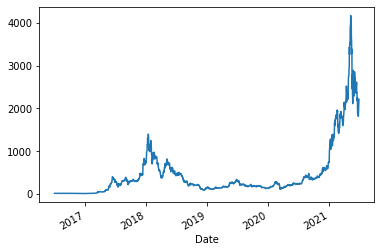

In [ ]:

df['Close'].plot()

In [ ]:
df.shape

(1822, 7)

In [ ]:
data=df.copy()

In [ ]:
data.dtypes

High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Adj Close           float64
Date         datetime64[ns]
dtype: object

In [ ]:
data.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Date'], dtype='object')

**Feature Engineering is Implemented on the data**

Feature Engineering
Almost every time series problem will have some external features or some internal feature engineering to help the model.

Let's add some basic features like lag values of available numeric features that are widely used for time series problems. Since we need to predict the price of the stock for a day, we cannot use the feature values of the same day since they will be unavailable at actual inference time. We need to use statistics like mean, standard deviation of their lagged values.

We will use three sets of lagged values, one previous day, one looking back 7 days and another looking back 30 days as a proxy for last week and last month metrics.

In [ ]:
lag_features=['High','Low','Volume']
window1=3
window2=7

In [ ]:
for feature in lag_features:
    data[feature+'rolling_mean_3']=data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7']=data[feature].rolling(window=window2).mean()

In [ ]:
for feature in lag_features:
    data[feature+'rolling_std_3']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7']=data[feature].rolling(window=window2).std()

In [ ]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,Date,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7
Date,,,,,,,,,,,,,,,,,,,
2016-06-30,12.7419,12.2536,12.6029,12.4615,15801300.0,12.4615,2016-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01,12.4913,11.7335,12.4381,12.1995,17236500.0,12.1995,2016-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-02,12.2209,11.9502,12.2160,12.1284,8987070.0,12.1284,2016-07-02,12.4847,NaN,11.979100,NaN,1.400829e+07,NaN,0.260563,NaN,0.261252,NaN,4.407316e+06,NaN
2016-07-03,12.1452,11.5891,12.1208,11.7202,10588700.0,11.7202,2016-07-03,12.2858,NaN,11.757600,NaN,1.227076e+07,NaN,0.181949,NaN,0.181752,NaN,4.374387e+06,NaN
2016-07-04,11.8802,11.3895,11.6961,11.4710,12943500.0,11.4710,2016-07-04,12.0821,NaN,11.642933,NaN,1.083976e+07,NaN,0.178900,NaN,0.284200,NaN,1.990127e+06,NaN


In [ ]:
data.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Date',
       'Highrolling_mean_3', 'Highrolling_mean_7', 'Lowrolling_mean_3',
       'Lowrolling_mean_7', 'Volumerolling_mean_3', 'Volumerolling_mean_7',
       'Highrolling_std_3', 'Highrolling_std_7', 'Lowrolling_std_3',
       'Lowrolling_std_7', 'Volumerolling_std_3', 'Volumerolling_std_7'],
      dtype='object')

In [ ]:
data.shape

(1822, 19)

In [ ]:
data.isna().sum()

High                    0
Low                     0
Open                    0
Close                   0
Volume                  0
Adj Close               0
Date                    0
Highrolling_mean_3      2
Highrolling_mean_7      6
Lowrolling_mean_3       2
Lowrolling_mean_7       6
Volumerolling_mean_3    2
Volumerolling_mean_7    6
Highrolling_std_3       2
Highrolling_std_7       6
Lowrolling_std_3        2
Lowrolling_std_7        6
Volumerolling_std_3     2
Volumerolling_std_7     6
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Date',
       'Highrolling_mean_3', 'Highrolling_mean_7', 'Lowrolling_mean_3',
       'Lowrolling_mean_7', 'Volumerolling_mean_3', 'Volumerolling_mean_7',
       'Highrolling_std_3', 'Highrolling_std_7', 'Lowrolling_std_3',
       'Lowrolling_std_7', 'Volumerolling_std_3', 'Volumerolling_std_7'],
      dtype='object')

In [ ]:
ind_features=['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7',  'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7']

**Training and Testing the Data** 

In [ ]:
training_data=data[0:1400]
test_data=data[1400:]

In [ ]:
training_data

,High,Low,Open,Close,Volume,Adj Close,Date,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7
Date,,,,,,,,,,,,,,,,,,,
2016-07-06,11.105600,10.280800,10.575800,10.528900,1.813730e+07,10.528900,2016-07-06,11.501200,12.014700,10.415520,11.253280,2.553590e+07,1.846018e+07,0.387567,0.563764,0.914096,0.966643,1.750640e+07,1.240573e+07
2016-07-07,10.565800,9.803210,10.535900,10.109400,1.540720e+07,10.109400,2016-07-07,11.063067,11.703829,9.886757,10.903224,2.635713e+07,1.840388e+07,0.477423,0.683250,0.359624,0.987478,1.665753e+07,1.242069e+07
2016-07-08,11.524800,9.961260,10.115300,11.394600,2.003980e+07,11.394600,2016-07-08,11.065400,11.565757,10.015090,10.650047,1.786143e+07,1.880435e+07,0.480762,0.588710,0.243303,0.966086,2.328588e+06,1.242197e+07
2016-07-09,11.456700,10.729500,11.417700,10.965500,1.725480e+07,10.965500,2016-07-09,11.182433,11.456586,10.164657,10.475661,1.756727e+07,1.998546e+07,0.535105,0.512954,0.495511,0.785597,2.332053e+06,1.170533e+07
2016-07-10,11.013700,10.782200,10.960400,10.947600,5.479240e+06,10.947600,2016-07-10,11.331733,11.294943,10.490987,10.360390,1.425795e+07,1.925553e+07,0.277522,0.431623,0.459513,0.640856,7.729057e+06,1.251992e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-02,215.847534,212.878677,214.230087,215.325378,1.826088e+10,215.325378,2020-05-02,220.335083,211.020599,209.032160,201.184664,2.238880e+10,2.125529e+10,6.293993,11.635258,3.398283,7.727434,5.099359e+09,4.217840e+09
2020-05-03,219.270874,208.692368,215.352066,210.933151,2.046903e+10,210.933151,2020-05-03,217.582143,213.867157,209.783976,203.173850,1.984874e+10,2.156010e+10,1.712131,10.702818,2.718562,7.591380,1.386054e+09,4.045222e+09
2020-05-04,211.828384,199.047729,210.890854,208.174011,2.260245e+10,208.174011,2020-05-04,215.648931,215.620813,206.872925,203.972931,2.044412e+10,2.212185e+10,3.725217,8.803695,7.092712,6.631454,2.170892e+09,3.845104e+09


**Model Creation and Forecasting the model on basis of the Data** 

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima

In [ ]:
model=auto_arima(y=training_data['Close'],exogenous=training_data[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=11512.361, Time=3.91 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=11830.670, Time=1.81 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=11626.562, Time=1.88 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=11547.483, Time=2.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=20571.658, Time=1.73 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=11548.506, Time=3.37 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=11510.810, Time=3.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=11549.587, Time=3.28 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=11509.833, Time=2.97 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=11510.669, Time=3.46 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=11512.705, Time=3.19 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=11507.890, Time=2.65 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=11624.594, Time=1.74 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=11508.729, Time=3.14 sec
 ARIMA(2,0,1)(0,0,0

In [ ]:
model.fit(training_data['Close'],training_data[ind_features])

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
forecast=model.predict(n_periods=len(test_data), exogenous=test_data[ind_features])

In [ ]:
test_data['Forecast_ARIMA']=forecast

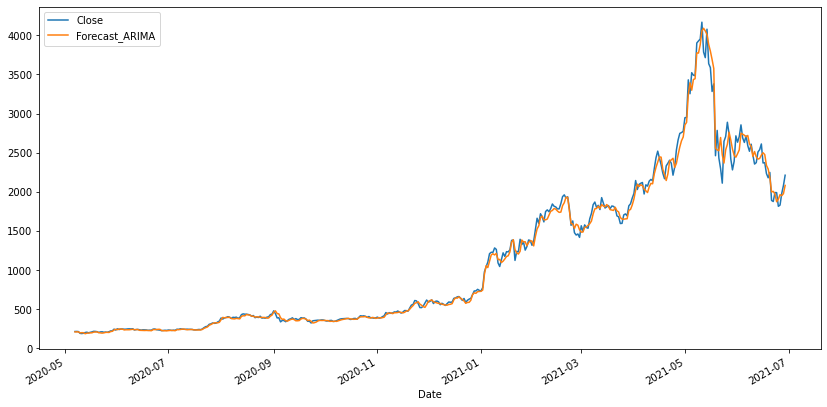

In [ ]:
test_data[['Close','Forecast_ARIMA']].plot(figsize=(14,7))

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(test_data['Close'],test_data['Forecast_ARIMA']))

78.37818903132606

In [ ]:
mean_absolute_error(test_data['Close'],test_data['Forecast_ARIMA'])

44.981863834359515